In [10]:
# extract log file and make runtime plots and tables

log = open("/Users/shawnmeier/Documents/source/bounder/soot_hopper/log/logging.log_fullRun_connectbot_6cb",'r')
loglines = log.readlines()
log.close()

#get index of recent run
startInd = 0
lastRunStart = 0
for line in loglines:
    if "Starting experiments run" in line:
        lastRunStart = startInd
    startInd += 1

expLines = loglines[lastRunStart:]
rowtimes = [line for line in loglines if "Row" in line and "time(ms)" in line]
for rowtime in rowtimes:
    spl = rowtime.split(":")
    print("%s %f" % (spl[-2], float(spl[-1])/1000000))

371 - Row 1 withUnsub time(ms) 14.265612
371 - Row 1 noUnsub time(ms) 9.931703
467 - Row 2 disable time(ms) 48.586163
467 - Row 2 noDisable time(ms) 16.496524
662 - Row 5 withCheck time(ms) 812.556468
662 - Row 5 noCheck time(ms) 21.456603
755 - Row 4 Witnessed time(ms) 115.240843
755 - Row 4 Timeout time(ms) 7419.039241


In [11]:
import matplotlib.pyplot as plt
def parseTime(s):
    return float(s.split(":")[-1].strip())/1000000
feasibility_times = [parseTime(line) for line in loglines if "feasibility " in line]
#subsumption time

subsumption_times_true = [parseTime(line) for line in loglines if "subsumption " in line and "result:true" in line]
subsumption_times_false = [parseTime(line) for line in loglines if "subsumption " in line and "result:false" in line]
print("feasibility lines: %i" % len(feasibility_times))
print("subsumption lines: %i" % len(subsumption_times))

feasibility lines: 16697
subsumption lines: 1879


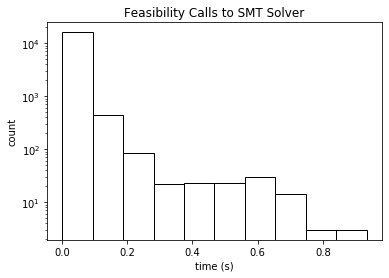

In [12]:
plt.hist(feasibility_times, color='white',edgecolor='black')
plt.xlabel("time (s)")
plt.ylabel("count")
plt.yscale('log')
plt.title('Feasibility Calls to SMT Solver')
plt.savefig("/Users/shawnmeier/Documents/source/bounder_paper/Bounder/paper2/figures/feas_time.png")
plt.show()

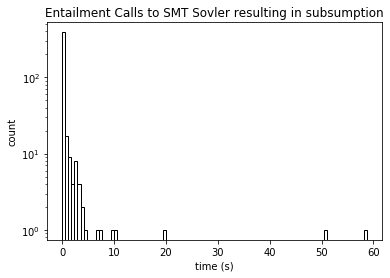

In [13]:
plt.hist(subsumption_times_true, bins=100, color='white',edgecolor='black')
plt.xlabel("time (s)")
plt.ylabel("count")
plt.yscale('log')
plt.title('Entailment Calls to SMT Sovler resulting in subsumption')
plt.savefig("/Users/shawnmeier/Documents/source/bounder_paper/Bounder/paper2/figures/subs_time.png")
plt.show()

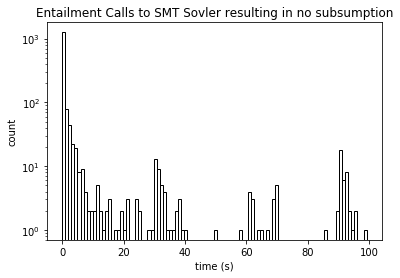

In [14]:
plt.hist(subsumption_times_false, bins=100, color='white',edgecolor='black')
plt.xlabel("time (s)")
plt.ylabel("count")
plt.yscale('log')
plt.title('Entailment Calls to SMT Sovler resulting in no subsumption')
plt.savefig("/Users/shawnmeier/Documents/source/bounder_paper/Bounder/paper2/figures/subs_time.png")
plt.show()